# 필요 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import gc

from tqdm.auto import tqdm

import sklearn

# 1. 5.0이 넘는 데이터 삭제후 rmse값 변동 확인, 이유 분석


data에서 조건에 맞게 filter한 data 객체 생성, shape 확인

seaborn으로 두 데이터 간의 차이 시각화

(19648, 9)


<Axes: xlabel='MedHouseVal', ylabel='Count'>

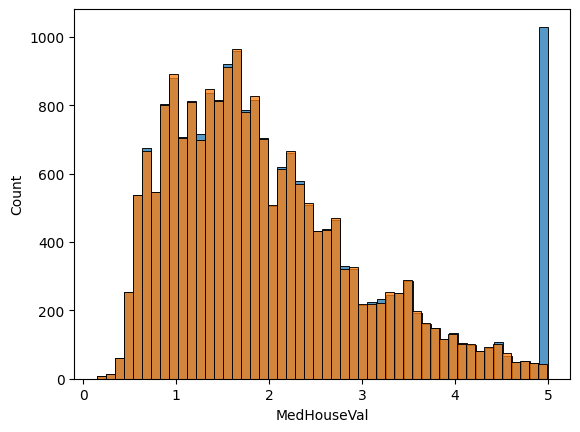

In [18]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)

data = housing['frame']

filtered_data = data[data['MedHouseVal'] < 5.0]

print(filtered_data.shape)

sns.histplot(data['MedHouseVal'], bins = 50)
sns.histplot(filtered_data['MedHouseVal'], bins = 50)

필터를 하기 전의 rmse

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

LRM = LinearRegression()

LRM.fit(X_train, y_train)

train_preds = LRM.predict(X_train)
test_preds = LRM.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

Train RMSE : 0.7218
Test RMSE : 0.7436


필터를 한 후의 rmse

In [7]:
X = filtered_data.drop('MedHouseVal', axis = 1)
y = filtered_data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

LRM = LinearRegression()

LRM.fit(X_train, y_train)

train_preds = LRM.predict(X_train)
test_preds = LRM.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Train RMSE after filter : %.4f" % train_rmse)
print("Test RMSE after filter : %.4f" % test_rmse)

Train RMSE after filter : 0.6299
Test RMSE after filter : 0.6482


첫째는 모델이 너무 큰 값들에서의 error를 줄이기 위해서 최적화하지 않아서, 일반적인 데이터에 대한 집중도를 올릴 수 있었을 것임을 생각할 수 있다.

둘째는 데이터 범위가 줄어들었기 때문에 모델의 학습 난이도가 낮아진 것으로 생각할 수 있다.

# 2. Ramdom Forest 모델로 변경

In [19]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)

train_preds = RFR.predict(X_train)
test_preds = RFR.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

Train RMSE : 0.1893
Test RMSE : 0.4886


현실의 집값을 생각해 봤을 때 방의 개수나 연식, 지역의 특성 같은 것이 집값에 영향을 주긴 하지만 이것들이 선형적인 관계를 띄고 있다고 생각하기는 어려운 특징이라고 생각된다.

Linear Regression 모델은 직선으로써 데이터들의 관계를 찾으려고 하기 때문에 집값을 예측하는 모델로써는 여러 특성들의 비선형적 관계를 잘 이용하고, 이상치에 잘 대응하는 Random Forest 모델이 더 적합했던 것 같다.

# 3. Gradiant Descent Algorithm으로 Simple Linear Regression Model 학습시키기

data 생성

In [43]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * np.random.randn(100, 1)

학습

손실 함수는 Mean Squared Error을 사용했다.

빨간 일차함수가 학습 이전, 파란색이 학습 후이다.

Final parameters: w = -0.7881, b = 4.3461


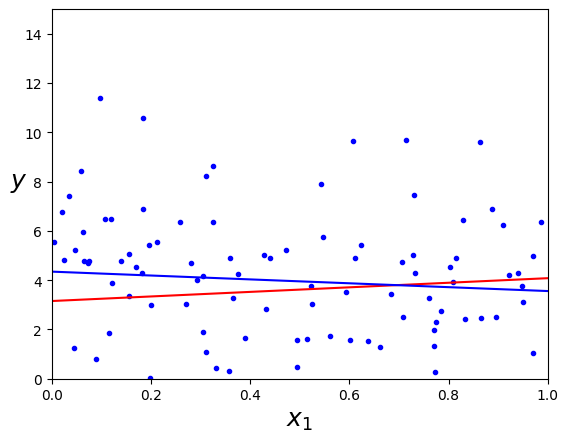

In [52]:
plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18, rotation = False)
plt.axis([0, 1, 0, 15])

#init slope and y-intercept randomly
w = np.random.normal(1, 1)
b = np.random.normal(4, 1)

domain = np.arange(0, 1, 0.001)

plt.plot(domain, w * domain + b, color="red")

learning_rate = 0.01
epochs = 1000

n = len(X)
for epoch in range(epochs):
    y_pred = w * X + b

    dw = -(2/n) * np.sum(X * (y - y_pred))  # Gradient w.r.t. weight
    db = -(2/n) * np.sum(y - y_pred)        # Gradient w.r.t. bias

    w = w - learning_rate * dw
    b = b - learning_rate * db

print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

plt.plot(domain, w * domain + b, color="blue")

plt.show()